<a href="https://colab.research.google.com/github/hatkiet/Project_4/blob/Fara_branch/Neural_Network_actual_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from google.colab import files
import io


In [2]:
# Upload a file from the local filesystem using Google Colab's file upload interface
uploaded_file = files.upload()

Saving heart_2022_cleaned.csv to heart_2022_cleaned.csv


In [3]:
# Extract the list of uploaded file names and display them
files_uploaded = list(uploaded_file.keys())
files_uploaded

['heart_2022_cleaned.csv']

In [4]:
# Read the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded_file[files_uploaded[0]]))
df

,Sex,Age,Race,BMI,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,SleepHours,...,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
0,0,12,0,26.57,4,0.0,0.0,0,0,6.0,...,0,0,0,0,0,0,0,0,0,0
1,0,7,0,25.61,3,2.0,3.0,1,0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,0,21.77,1,2.0,0.0,1,1,9.0,...,0,1,0,0,0,0,1,0,0,0
3,1,12,0,26.08,0,1.0,0.0,0,0,7.0,...,0,0,1,0,1,0,1,0,0,1
4,0,12,1,22.96,3,0.0,0.0,1,0,7.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318929,1,9,3,29.86,2,0.0,15.0,1,0,7.0,...,0,1,0,0,1,0,1,0,0,1
318930,1,2,0,31.19,2,0.0,0.0,1,0,8.0,...,0,1,0,0,0,0,1,0,0,0
318931,0,6,1,28.66,4,2.0,2.0,1,0,7.0,...,0,0,0,0,0,0,1,0,0,0
318932,1,10,1,32.55,3,0.0,0.0,0,1,5.0,...,0,0,1,0,0,1,1,0,0,0


In [5]:
# Split data into features (X) and target variable (y)
X = df.drop(columns="HeartAttack")
y = df["HeartAttack"]

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [7]:
# Display the first 5 values of the target variable to check the data
y[:5]

0    0
1    0
2    0
3    1
4    0
Name: HeartAttack, dtype: int64

In [8]:
# Initialize the MinMaxScaler to scale the features to a range between 0 and 1
scaler = MinMaxScaler()
X_scaled  =scaler.fit_transform(X)

In [9]:
# Split the dataset into training and testing sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, stratify=y, shuffle=True)

In [10]:
# Without Smote:

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras import Sequential, layers

In [13]:
# Initialize a new sequential model using Keras
model = Sequential()

In [14]:
# Get the number of columns/features in the dataset
len(X.columns)

21

In [15]:
# Get the number of features/columns in the training dataset
xtrain.shape[1]

21

In [16]:
# Add layers to the neural network model
# The first layer is a dense layer with a number of units equal to the number of features in the dataset
# The input shape is specified as the number of features in the training dataset, and the activation function is ReLU
model.add(layers.Dense(len(X.columns), input_shape =(xtrain.shape[1],), activation ="relu"))
# Add a second dense layer with 42 units
model.add(layers.Dense(42))
# Add a third dense layer with 21 units
model.add(layers.Dense(21))
# Add an output dense layer with 1 unit and a sigmoid activation function
# This layer is used for binary classification
model.add(layers.Dense(1, activation ="sigmoid"))

In [17]:
# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                462       
                                                                 
 dense_1 (Dense)             (None, 42)                924       
                                                                 
 dense_2 (Dense)             (None, 21)                903       
                                                                 
 dense_3 (Dense)             (None, 1)                 22        
                                                                 
Total params: 2311 (9.03 KB)
Trainable params: 2311 (9.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Compile the model with the specified settings
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [19]:
# Train the model on the training data
history = model.fit(xtrain,ytrain,batch_size=100,epochs=100, validation_split=0.2)

Epoch 1/100
1787/1787 [==============================] - 8s 4ms/step - loss: 0.1604 - accuracy: 0.9471 - val_loss: 0.1421 - val_accuracy: 0.9517
Epoch 2/100
1787/1787 [==============================] - 4s 2ms/step - loss: 0.1476 - accuracy: 0.9482 - val_loss: 0.1396 - val_accuracy: 0.9516
Epoch 3/100
1787/1787 [==============================] - 4s 2ms/step - loss: 0.1460 - accuracy: 0.9486 - val_loss: 0.1408 - val_accuracy: 0.9514
Epoch 4/100
1787/1787 [==============================] - 6s 3ms/step - loss: 0.1444 - accuracy: 0.9489 - val_loss: 0.1391 - val_accuracy: 0.9514
Epoch 5/100
1787/1787 [==============================] - 4s 2ms/step - loss: 0.1437 - accuracy: 0.9491 - val_loss: 0.1397 - val_accuracy: 0.9512
Epoch 6/100
1787/1787 [==============================] - 7s 4ms/step - loss: 0.1433 - accuracy: 0.9494 - val_loss: 0.1392 - val_accuracy: 0.9515
Epoch 7/100
1787/1787 [==============================] - 5s 3ms/step - loss: 0.1427 - accuracy: 0.9494 - val_loss: 0.1399 - val_ac

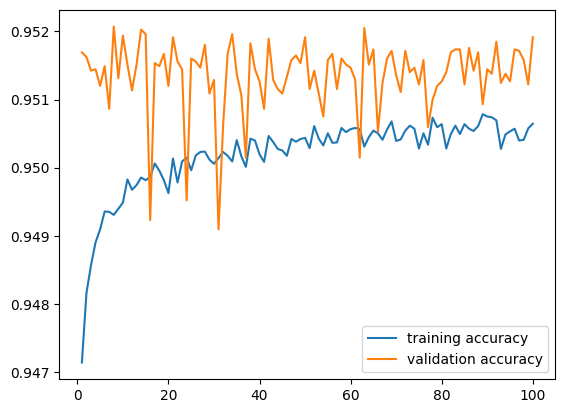

In [20]:
# Extract the training accuracy, validation accuracy, training loss, and validation loss from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,label = 'training accuracy')
plt.plot(epochs,val_acc,label = 'validation accuracy')
plt.legend()
plt.show()

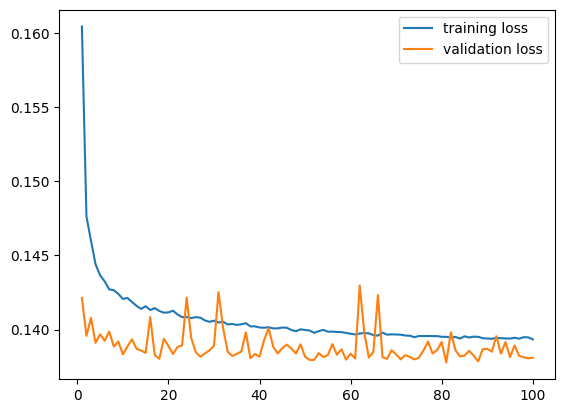

In [21]:
# Generate a range of epoch numbers corresponding to the length of the loss list
epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,label = 'training loss')
plt.plot(epochs,val_loss,label = 'validation loss')
plt.legend()
plt.show()

In [22]:
# Using the trained model to make predictions on the test set
y_hat = model.predict(xtest)

2991/2991 [==============================] - 13s 4ms/step


In [23]:
# Convert the predicted probabilities to binary class labels (0 or 1)
y_pres = (y_hat > 0.5).astype(int).flatten()

In [24]:
# Print the classification report to evaluate the performance of the model on the test set
print(classification_report(ytest,y_pres))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     90597
           1       0.62      0.17      0.27      5084

    accuracy                           0.95     95681
   macro avg       0.79      0.58      0.62     95681
weighted avg       0.94      0.95      0.94     95681

